# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We will dummify sex, species, and island.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [15]:
penguins_new = pd.get_dummies(penguins, columns= ["species", "island", "sex"], drop_first = True)
penguins_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True


Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

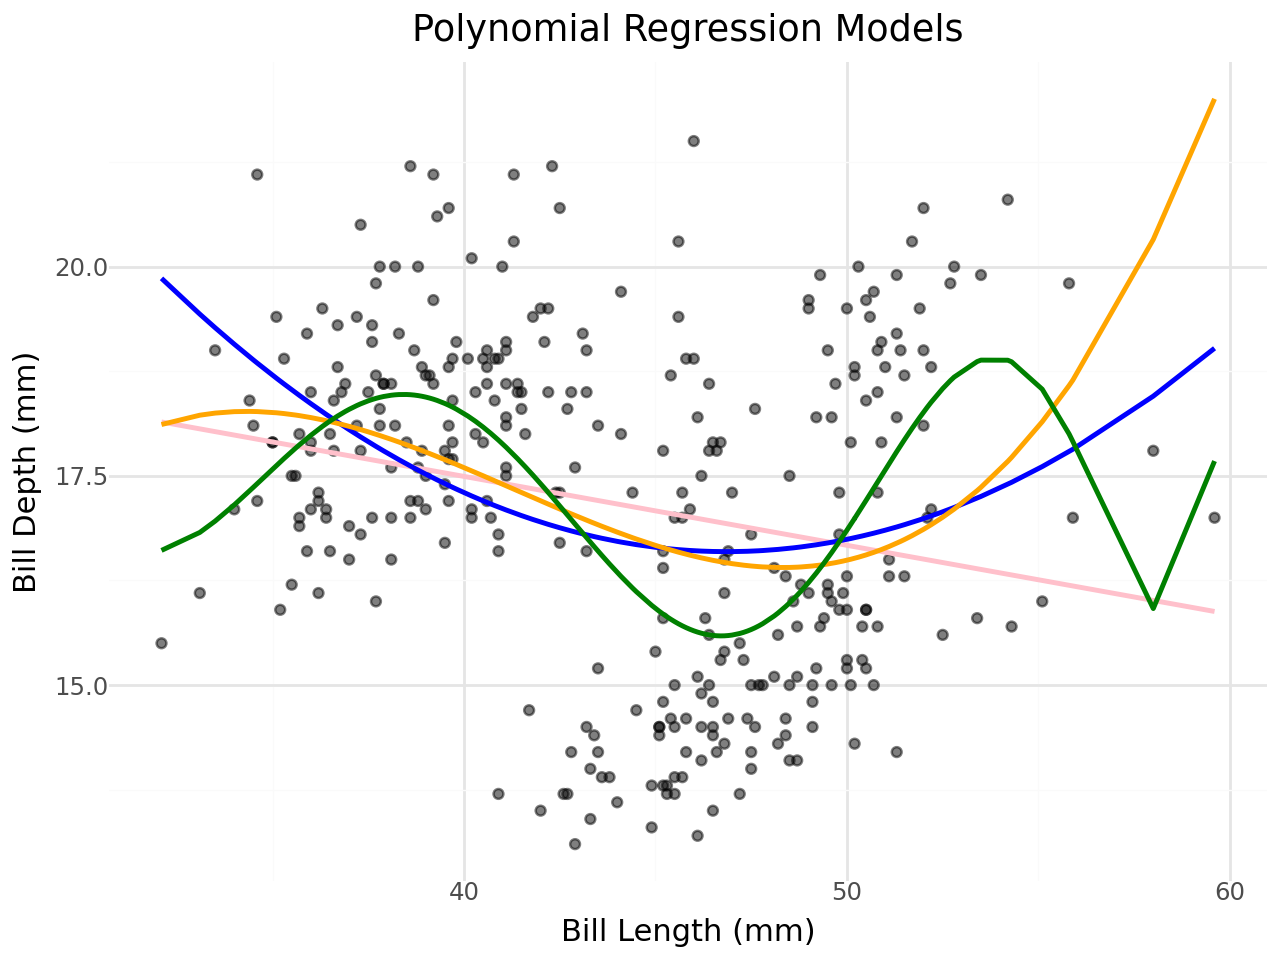

In [20]:
from plotnine import * 

# drop na values
penguins_new = penguins.dropna()

#predictor and response variables
X = penguins_new[['bill_length_mm']]
y = penguins_new['bill_depth_mm']

# create polynomial
degrees = [1, 2, 3, 10]
predictions = {}

# create dataframe
for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    # create polynomial
    X_poly = poly.fit_transform(X)
    # linear regression
    model = LinearRegression()
    # fit the model
    model.fit(X_poly, y)
    # predictions
    predictions[degree] = model.predict(X_poly)

# dataframe for plotting predictions
plot_data = pd.DataFrame({
    'bill_length_mm': X['bill_length_mm'],
    'bill_depth_mm': y,
})

# add predictions
for degree in degrees:
    plot_data[f'pred_degree_{degree}'] = predictions[degree]

#scatterplot
(ggplot(plot_data, aes(x = 'bill_length_mm'))
    + geom_point(aes(y = 'bill_depth_mm'), color = "black", alpha = 0.5)
    + geom_line(aes(y = 'pred_degree_1'), color = 'pink', size = 1)
    + geom_line(aes(y = 'pred_degree_2'), color = 'blue', size = 1)
    + geom_line(aes(y = 'pred_degree_3'), color = "orange", size = 1)
    + geom_line(aes(y = 'pred_degree_10'), color = "green", size = 1)
    + labs(title = 'Polynomial Regression Models', x = 'Bill Length (mm)', y = 'Bill Depth (mm)')
    + theme_minimal()
)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of the models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear model (pink) is underfitting the model because it is a straight line, so it does not fully capture the pattern for nonlinear data. The polynomial (blue) is overfitting the model because it is fitted closely to many points. The polynomial (orange) is the model that fits the data best because it is more of a clear reprsentation of the data. The polynomial (green) appears to be the best model because it follows the trend of the plot better than the others.